In [36]:
import torch
import matplotlib.pyplot as plt
import torchvision

import sys
sys.path.insert(0, 'Pytorch-UNet')
sys.path.insert(0, 'utils')
from plotting_utils import plot_pytorch_images, make_grid
from misc import merge
from unet.unet_model import UNet
from torch.nn import functional as F

In [ ]:
model_64_256 = torch.load('unet_mask_64_256')
model_64_256.to(1);

model_32_64 = torch.load('unet_mask_32_64')
model_32_64.to(0);


# vae = torch.load('VAE_10K_32_HQ')
# vae.to(0);

In [8]:
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-512',
#                        pretrained=True, useGPU=False)
# this model outputs 256 x 256 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-256',
                       pretrained=True, useGPU=False)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


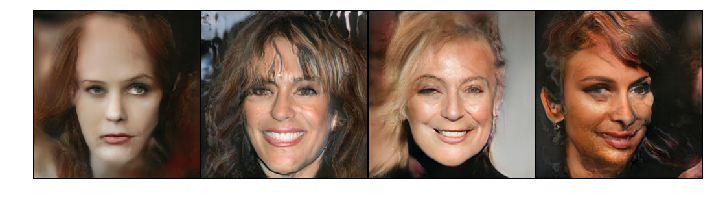

In [51]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

generated_images = generated_images.clamp(min=-1, max=1)
generated_images = ((generated_images - torch.min(generated_images))/ (torch.max(generated_images) - torch.min(generated_images)))
# # let's plot these images using torchvision and matplotlib
# grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
make_grid(generated_images);
# plt.show()
# plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()

train real data


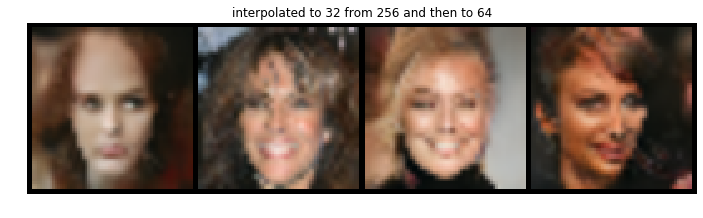

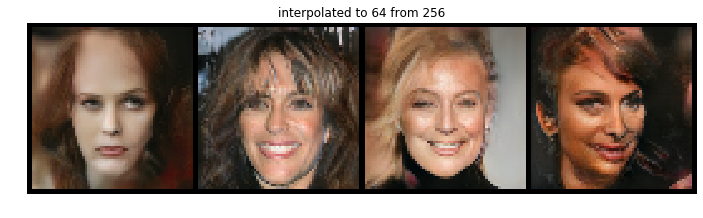

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


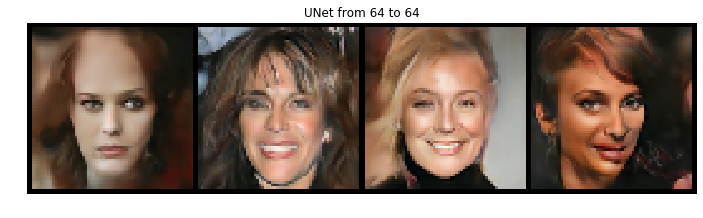

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


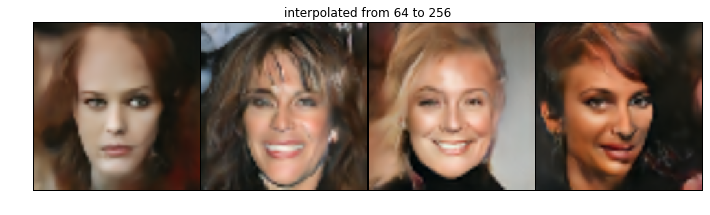

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


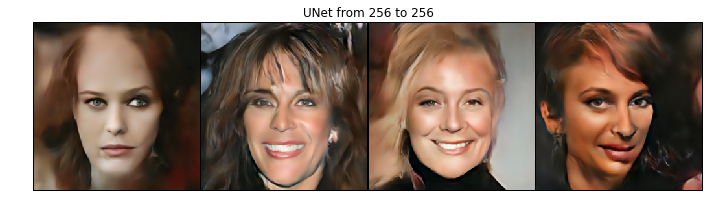

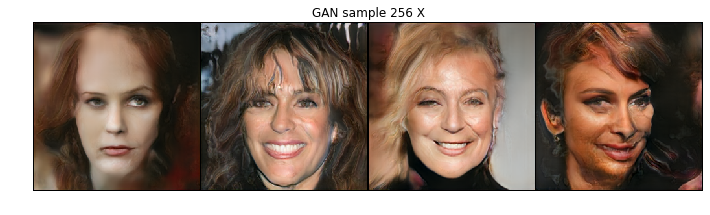

In [52]:
print("train real data")
x = generated_images
y = F.interpolate(F.interpolate(x, 32, mode="bilinear"), 64, mode="bilinear")
make_grid(y[0:5],title="interpolated to 32 from 256 and then to 64");
make_grid(F.interpolate(x, 64, mode="bilinear")[0:5], title="interpolated to 64 from 256")
y = y.to(0)
x_mask_hat = model_32_64(y)
x_hat = y + x_mask_hat
make_grid(x_hat[0:5], title="UNet from 64 to 64");
y = F.interpolate(x_hat, 256, mode="bilinear")
make_grid(y[0:5], title="interpolated from 64 to 256");
y = y.to(1)
x_mask_hat = model_64_256(y)
x_hat_final = y + x_mask_hat
make_grid(x_hat_final[0:5], title="UNet from 256 to 256");
make_grid(x[0:5], title="GAN sample 256 X");